In [ ]:
!pip install llnl-thicket==2024.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
import thicket as th
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from tabulate import tabulate
import os
#import sys
#sys.path.append(
#    "/scratch/group/csce-435-f25/python-3.10.8/lib/python3.10/site-packages")


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path Configuration
project_path = "/content/drive/My Drive/csce-435/project"

# Liist the files in the caliper folder to verify
# caliper directory MUST exist
caliper_folder = os.path.join(project_path, "cali")
files_in_folder = os.listdir(caliper_folder)
print("Files in the Folder", caliper_folder, "::")
print(files_in_folder)
print()

cali_files = glob(os.path.join(caliper_folder, "*.cali"))

# Plot Directory Path
plot_dir = os.path.join(project_path, 'plots')
print("Plot Directory: ", plot_dir)
print()
os.makedirs(plot_dir, exist_ok=True)

strong_scaling_plot_dir = os.path.join(plot_dir, 'strong-scaling')
strong_scaling_speedup_plot_dir = os.path.join(plot_dir, 'strong-scaling-speedup')
weak_scaling_plot_dir = os.path.join(plot_dir, 'weak-scaling')

os.makedirs(strong_scaling_plot_dir, exist_ok=True)
os.makedirs(strong_scaling_speedup_plot_dir, exist_ok=True)
os.makedirs(weak_scaling_plot_dir, exist_ok=True)

Files in the Folder /content/drive/My Drive/csce-435/project/cali ::
['2-65536-int-random.cali', '2-16777216-double-perturbed1.cali', '2-268435456-int-reversed.cali', '2-268435456-double-sorted.cali', '2-1048576-int-sorted.cali', '2-1048576-double-perturbed1.cali', '2-67108864-int-reversed.cali', '2-16777216-double-reversed.cali', '2-262144-int-perturbed1.cali', '2-262144-int-sorted.cali', '2-268435456-double-random.cali', '2-4194304-double-perturbed1.cali', '2-268435456-double-perturbed1.cali', '2-16777216-double-sorted.cali', '2-262144-int-reversed.cali', '2-67108864-int-random.cali', '2-268435456-int-perturbed1.cali', '2-4194304-int-random.cali', '2-4194304-double-random.cali', '2-268435456-int-random.cali', '2-1048576-double-random.cali', '2-262144-double-sorted.cali', '2-262144-double-reversed.cali', '2-4194304-int-perturbed1.cali', '2-4194304-double-reversed.cali', '2-67108864-double-sorted.cali', '2-4194304-int-reversed.cali', '2-262144-double-random.cali', '2-67108864-double-ra

In [ ]:
# Read the caliper files into Thicket
tk = th.Thicket.from_caliperreader(cali_files)
df = tk.dataframe.reset_index()
df_merged = df.merge(tk.metadata, left_on='profile', right_index=True)
df = df_merged[df_merged['data_type'] != 'float']

(2/2) Creating Thicket: 100%|██████████| 517/517 [00:03<00:00, 160.63it/s]
/usr/local/lib/python3.12/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [ ]:
df_sorted = df.sort_values(by=['input_size', 'num_procs', 'data_type', 'input_type'])
df_sorted.head(10)

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls (total),name,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,opts:node.order,opts:output,opts:region.count,opts:time.exclusive,implementation_source,group_num,scalability,num_procs,input_type,input_size,size_of_data_type,data_type,programming_model,algorithm,cluster,cmdline,libraries,launchdate
411,"{'name': 'main', 'type': 'function'}",3389471957,1.0,"(regionprofile,)",0.020360,0.020361,0.020361,0.040721,0.002134,0.002144,0.002139,0.004279,NaN,NaN,NaN,NaN,main,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,./cali/2-65536-double-perturbed1.cali,true,true,online,6,weak,2,perturbed1,65536,8,double,mpi,sample-sort,c,"[./sample_sort_mpi, --n, 65536, --datatype, do...","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761545224
929,"{'name': 'data_init_runtime', 'type': 'function'}",3389471957,2.0,"(regionprofile,)",0.000188,0.000189,0.000188,0.000377,0.000188,0.000189,0.000188,0.000377,1.0,1.0,1.0,2.0,data_init_runtime,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,./cali/2-65536-double-perturbed1.cali,true,true,online,6,weak,2,perturbed1,65536,8,double,mpi,sample-sort,c,"[./sample_sort_mpi, --n, 65536, --datatype, do...","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761545224
1447,"{'name': 'comp', 'type': 'function'}",3389471957,3.0,"(regionprofile,)",0.010991,0.016095,0.013543,0.027086,0.000064,0.000185,0.000124,0.000249,5.0,5.0,5.0,10.0,comp,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,./cali/2-65536-double-perturbed1.cali,true,true,online,6,weak,2,perturbed1,65536,8,double,mpi,sample-sort,c,"[./sample_sort_mpi, --n, 65536, --datatype, do...","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761545224
1965,"{'name': 'comp_large', 'type': 'function'}",3389471957,4.0,"(regionprofile,)",0.010758,0.015759,0.013259,0.026518,0.010758,0.015759,0.013259,0.026518,2.0,2.0,2.0,4.0,comp_large,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,./cali/2-65536-double-perturbed1.cali,true,true,online,6,weak,2,perturbed1,65536,8,double,mpi,sample-sort,c,"[./sample_sort_mpi, --n, 65536, --datatype, do...","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761545224
2483,"{'name': 'comp_small', 'type': 'function'}",3389471957,5.0,"(regionprofile,)",0.000151,0.000169,0.000160,0.000320,0.000151,0.000169,0.000160,0.000320,3.0,3.0,3.0,6.0,comp_small,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,./cali/2-65536-double-perturbed1.cali,true,true,online,6,weak,2,perturbed1,65536,8,double,mpi,sample-sort,c,"[./sample_sort_mpi, --n, 65536, --datatype, do...","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761545224
3001,"{'name': 'comm', 'type': 'function'}",3389471957,6.0,"(regionprofile,)",0.001467,0.001474,0.001471,0.002941,0.000032,0.000038,0.000035,0.000070,3.0,3.0,3.0,6.0,comm,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,./cali/2-65536-double-perturbed1.cali,true,true,online,6,weak,2,perturbed1,65536,8,double,mpi,sample-sort,c,"[./sample_sort_mpi, --n, 65536, --datatype, do...","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761545224
3519,"{'name': 'comm_small', 'type': 'function'}",3389471957,7.0,"(regionprofile,)",0.001168,0.001325,0.001246,0.002493,0.001168,0.001325,0.001246,0.002493,2.0,2.0,2.0,4.0,comm_small,2.13.1,2,"min#inclusive#sum#tim

In [ ]:
print(df['name'].unique())

['main' 'data_init_runtime' 'comp' 'comp_large' 'comp_small' 'comm'
 'comm_small' 'comm_large' 'correctness_check']


In [ ]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.389 main
├─ 0.340 comm
│  ├─ 0.024 comm_large
│  └─ 0.315 comm_small
├─ 0.019 comp
│  ├─ 0.019 comp_large
│  └─ 0.000 comp_small
├─ 0.028 correctness_check
└─ 0.000 data_init_runtime



- Experiment 1: 2 nodes, 64 processes, vary number of elements
- Experiment 2 (strong scaling): 2^22 elements, vary number of processes
- Experiment 3 (weak scaling): (2^16 elements, 16 processors), (2^18 elements, 32 processors), (2^20 elements, 64 processors), (2^22 elements, 128 processors), (2^24 elements, 256 processors), (2^26 elements, 512 processors), (2^28 elements, 1024 processors)
- Experiment 4 (vary data types): 2^22 elements, 64 processes, double/int
- Experiment 5 (vary initial sort level): 2^22 elements, 64 processes, (sorted/perturbed/random/reversed)
- Assume initial random sort level

In [ ]:
# === Sample Sort Caliper Analysis with Thicket ===

# Load Caliper files and Thicket
df = df_sorted
regions = ['comp_large', 'comm', 'main']
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
#input_types = [0, 1, 2, 3]
# input_type_map = {'Sorted': 'Sorted', '1_perc_perturbed': 'Perturbed', 'Random': 'Random', 'ReverseSorted': 'Reversed'}
# input_types = ['Sorted','1_perc_perturbed','Random','ReverseSorted'] # TODO: CHANGE HERE IF NEEDED
input_type_map = {'sorted': 'Sorted', 'perturbed1': 'Perturbed', 'random': 'Random', 'reversed': 'Reversed'}
input_types = ['sorted','perturbed1','random','reversed'] # TODO: CHANGE HERE IF NEEDED
num_procs_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
weak_scaling_configs = [
    (2**16, 16), (2**18, 32), (2**20, 64),
    (2**22, 128), (2**24, 256), (2**26, 512), (2**28, 1024)
]
fixed_procs = 64
fixed_size = 2**22
time_col = 'Total time' if 'Total time' in df.columns else 'time'

# --- Plot Style ---
plt.style.use('default')
color_list = None # Use default matplotlib colors
marker_list = ['x', 'o', 's', 'D']
line_styles = ['-', '--', '-.', ':']


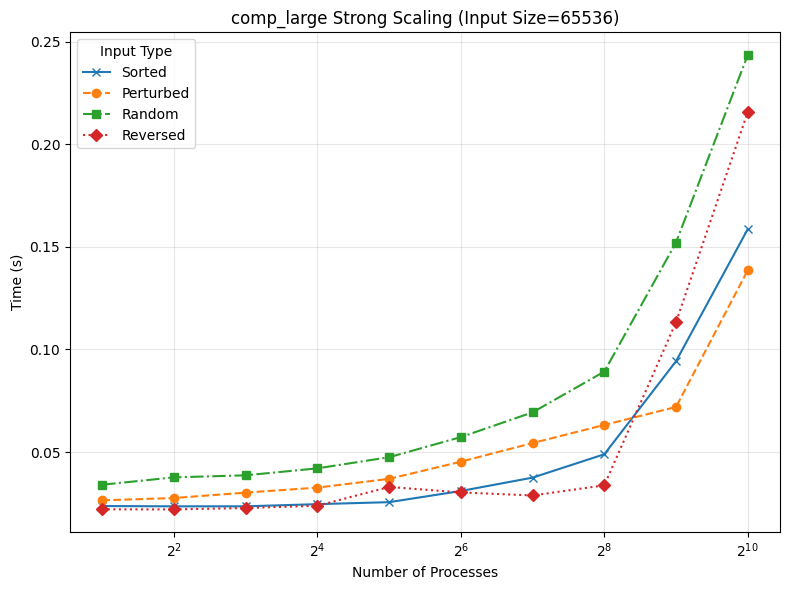

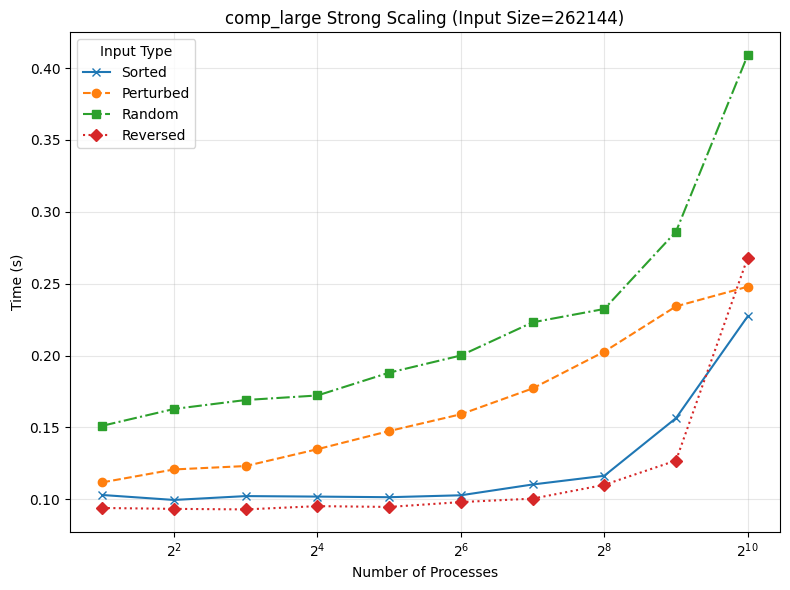

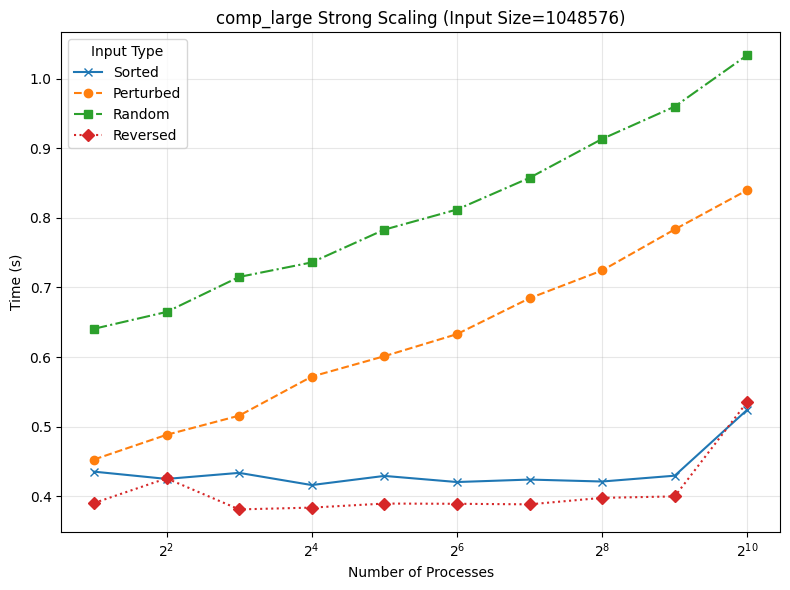

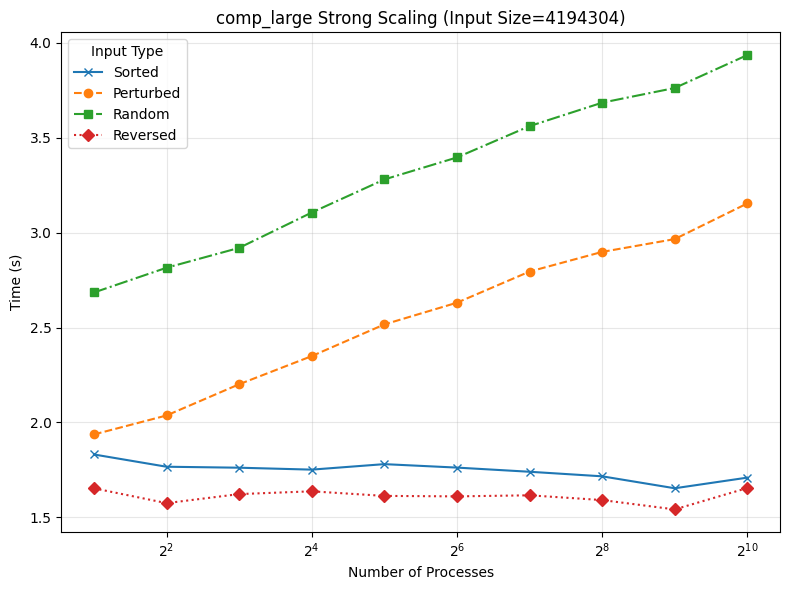

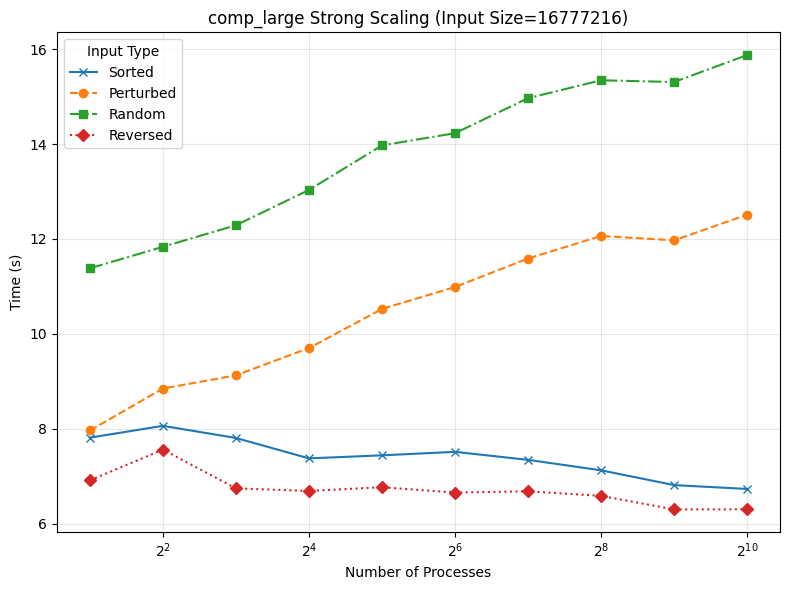

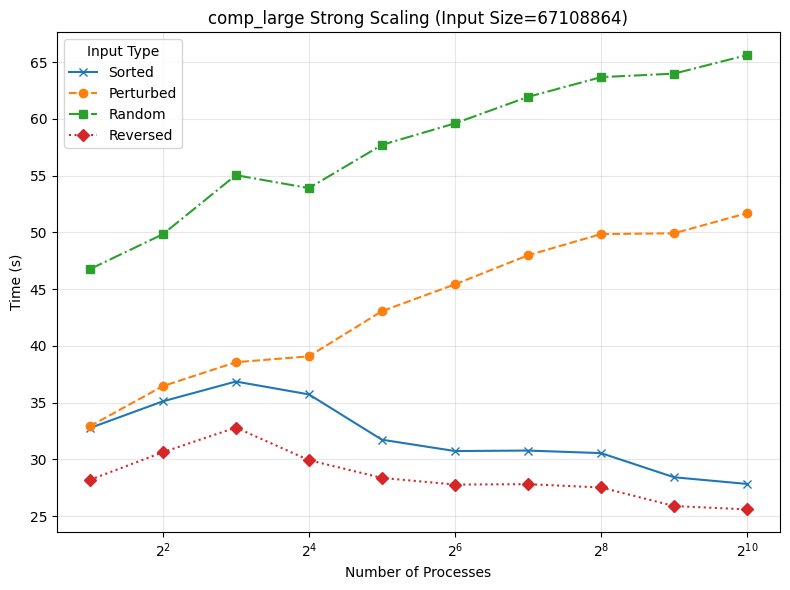

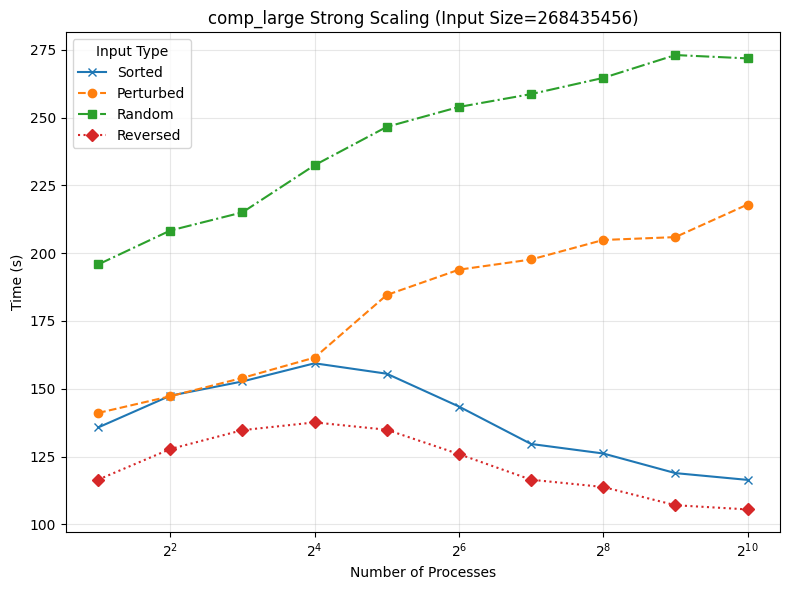

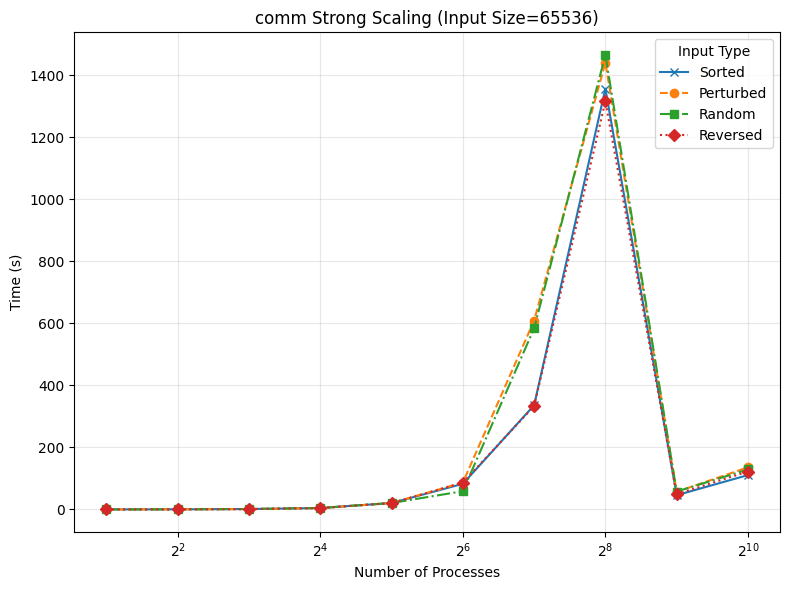

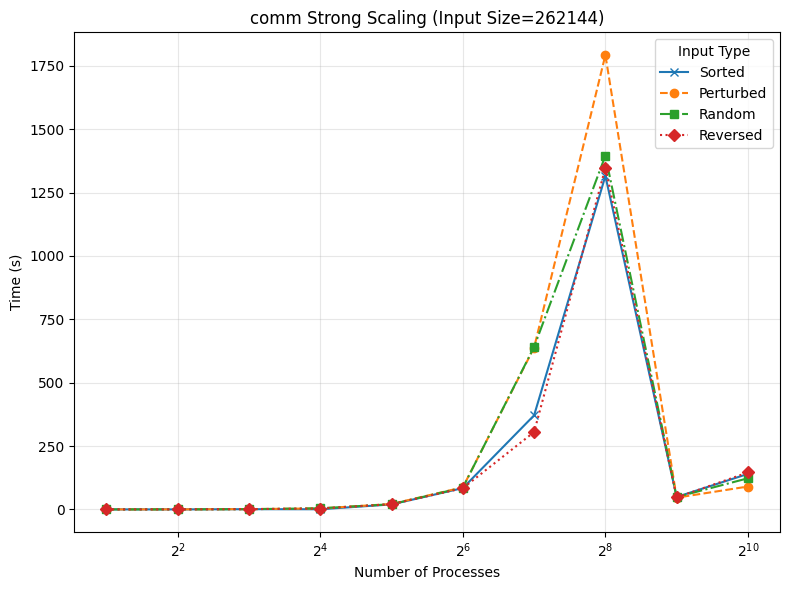

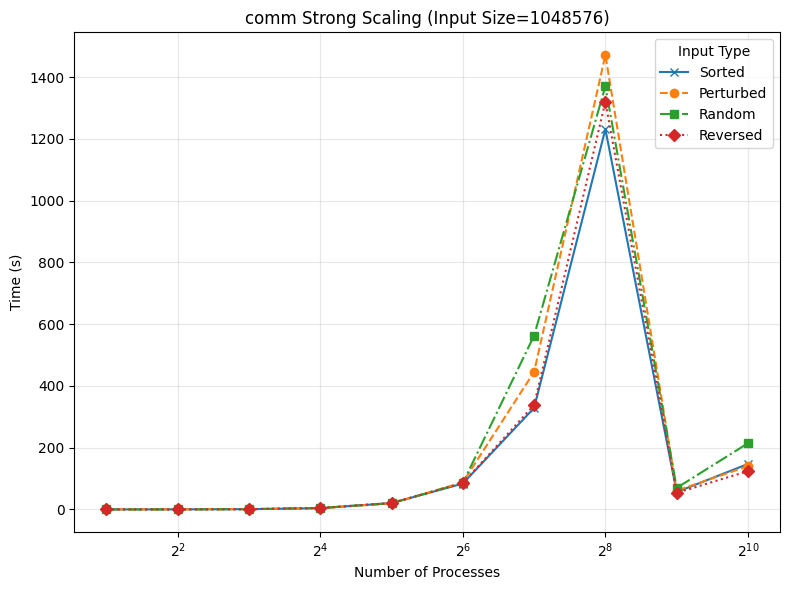

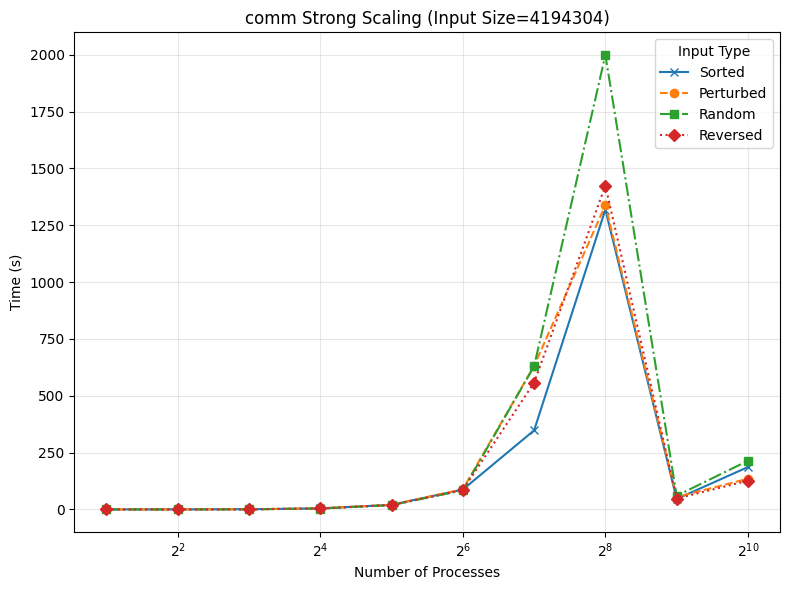

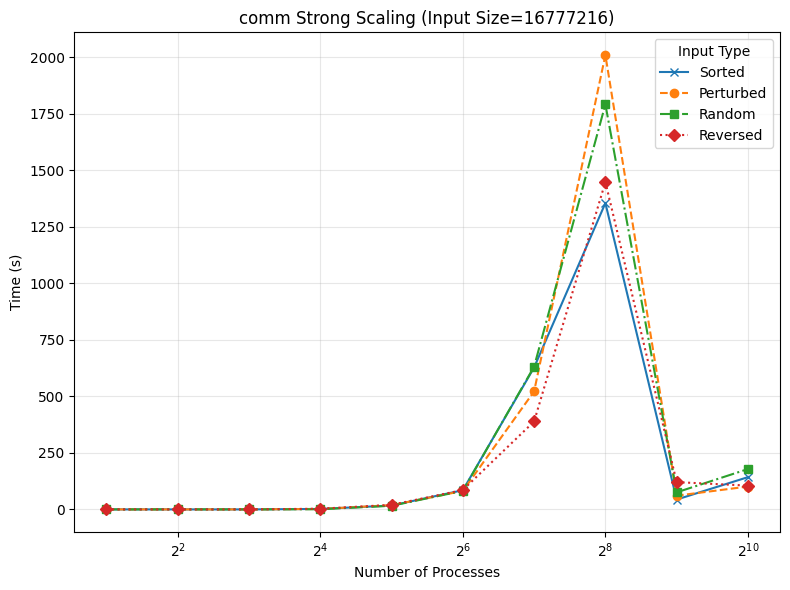

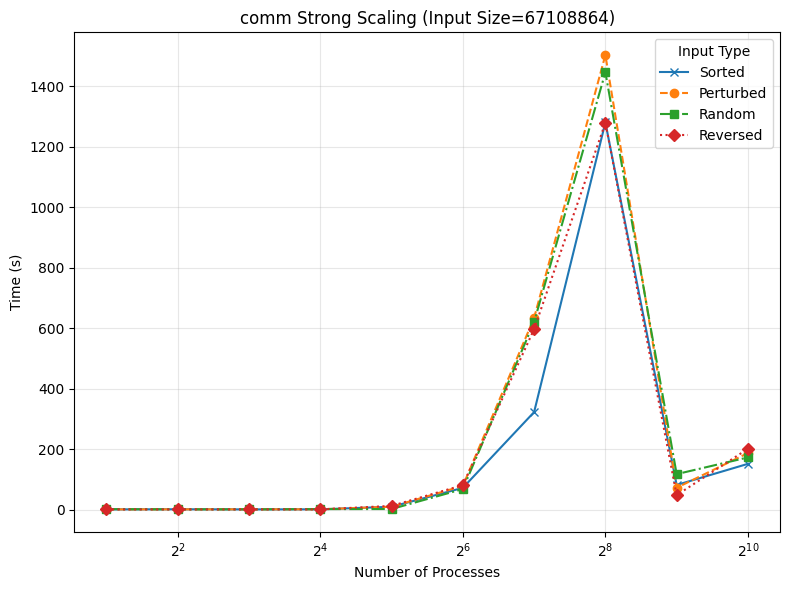

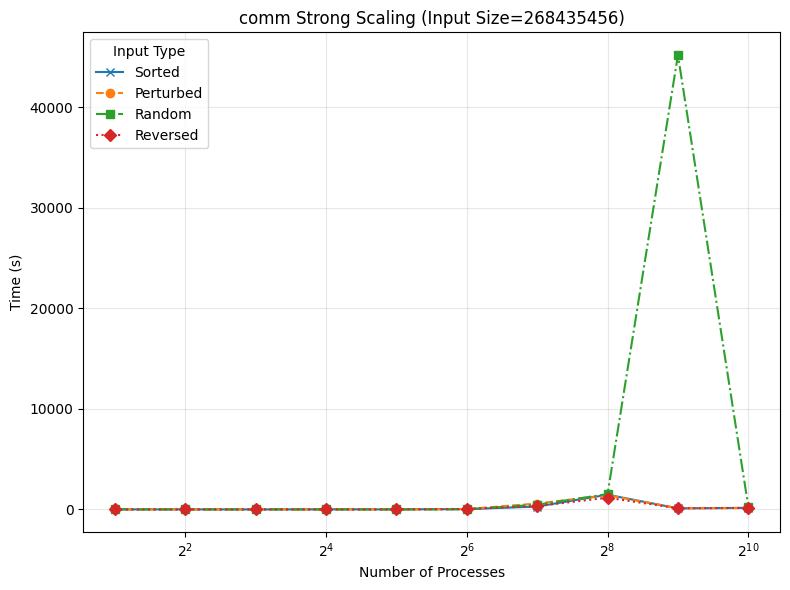

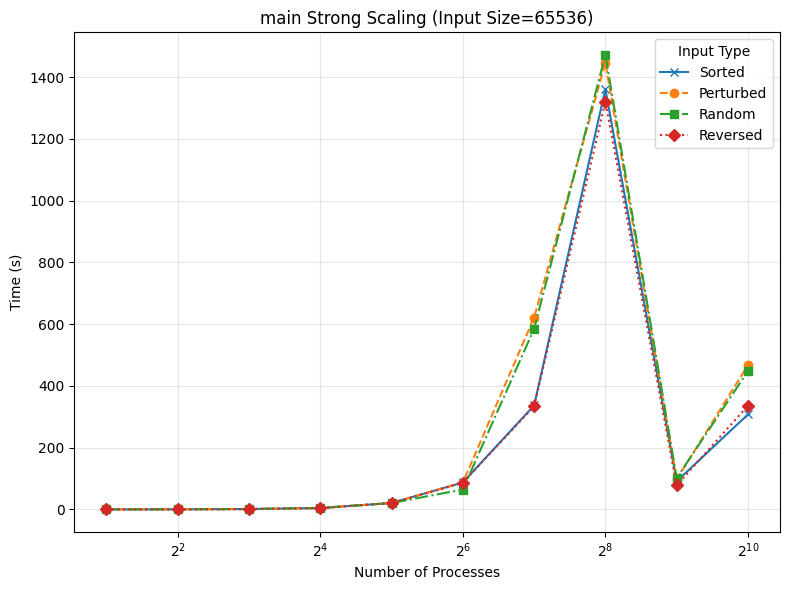

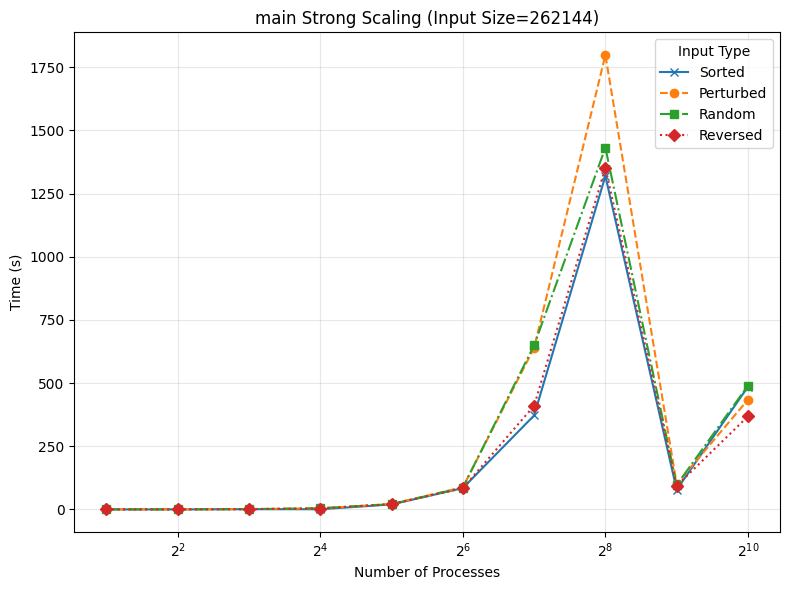

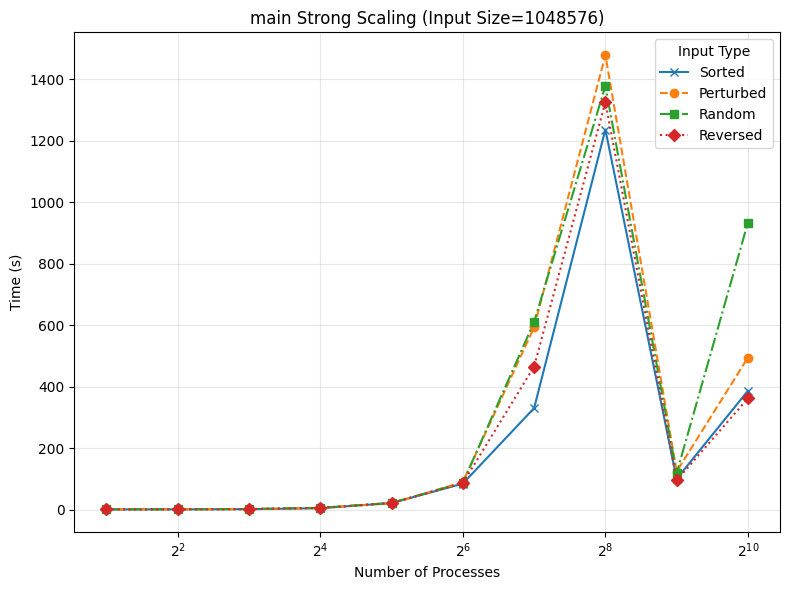

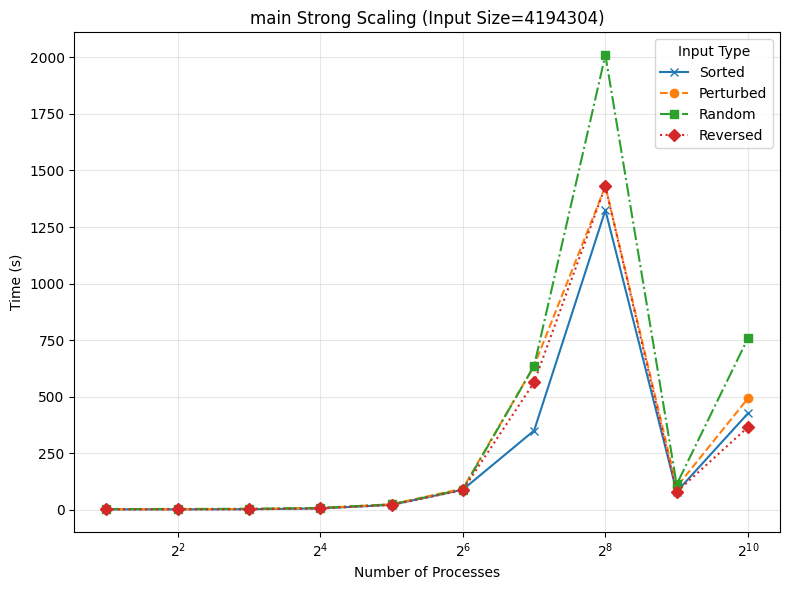

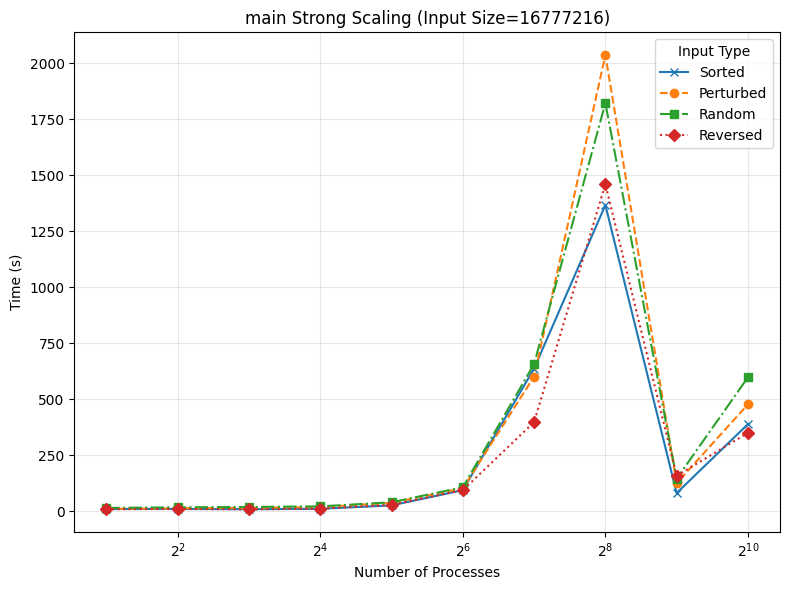

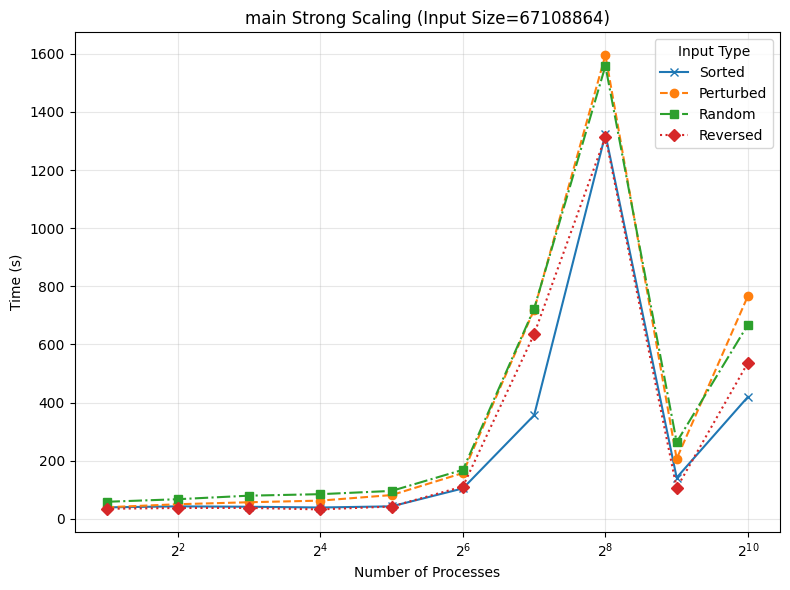

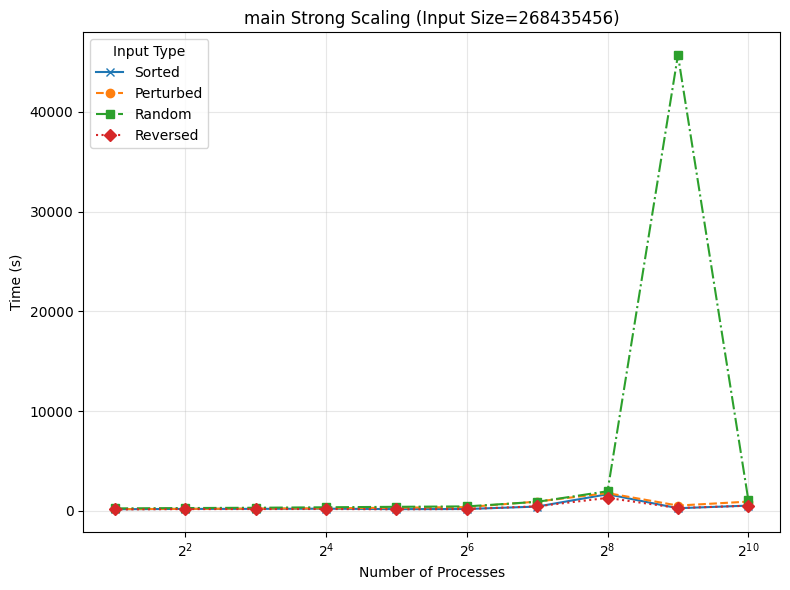

In [ ]:
# 1. Strong scaling plots for each input_size
for region in regions:
    for input_size in input_sizes:
        fig, ax = plt.subplots(figsize=(8, 6))
        for idx, input_type in enumerate(input_types):
            times, procs = [], []
            for num_proc in num_procs_list:
                mask = (df['name'] == region) & \
                       (df['input_size'] == input_size) & \
                       (df['num_procs'] == num_proc) & \
                       (df['input_type'] == input_type)
                data = df[mask]
                if len(data) > 0:
                    times.append(data[time_col].iloc[0])
                    procs.append(num_proc)
            if len(times) > 0:
                ax.plot(procs, times, marker=marker_list[idx], linestyle=line_styles[idx],
                        label=input_type_map[input_type])
        ax.set_xlabel('Number of Processes')
        ax.set_ylabel('Time (s)')
        ax.set_title(f'{region} Strong Scaling (Input Size={input_size})')
        ax.set_xscale('log', base=2)
        ax.grid(True, alpha=0.3)
        ax.legend(title='Input Type', loc='best')
        plt.tight_layout()
        plt.savefig(
            os.path.join(strong_scaling_plot_dir, f'strong_scaling_{region}_input_size_{input_size}.png'), dpi=150)
        plt.show()

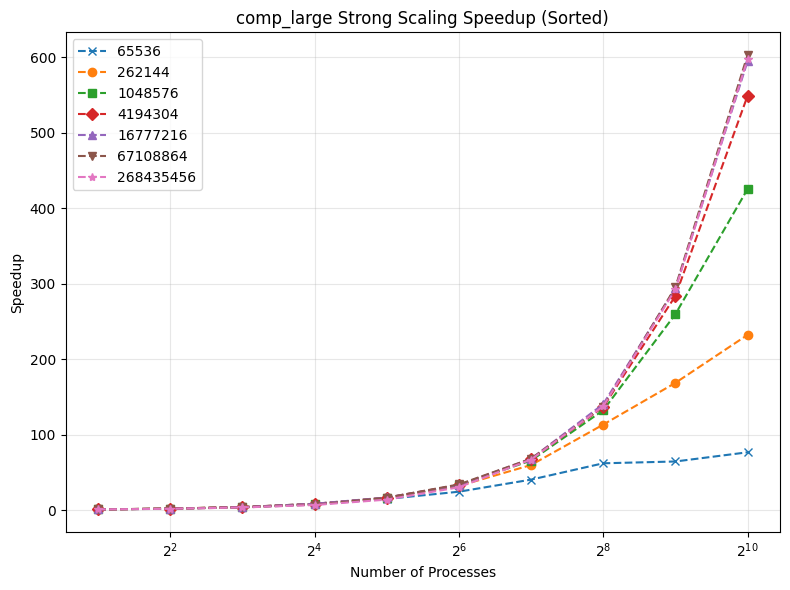

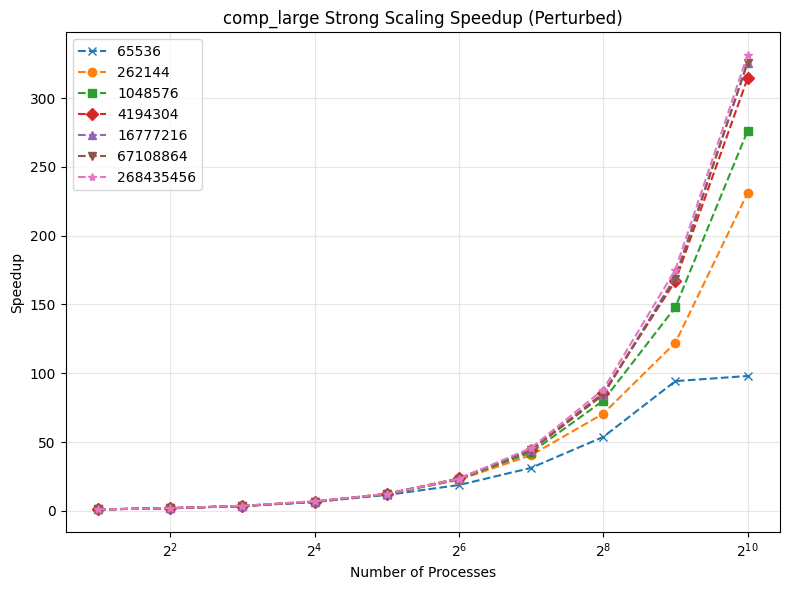

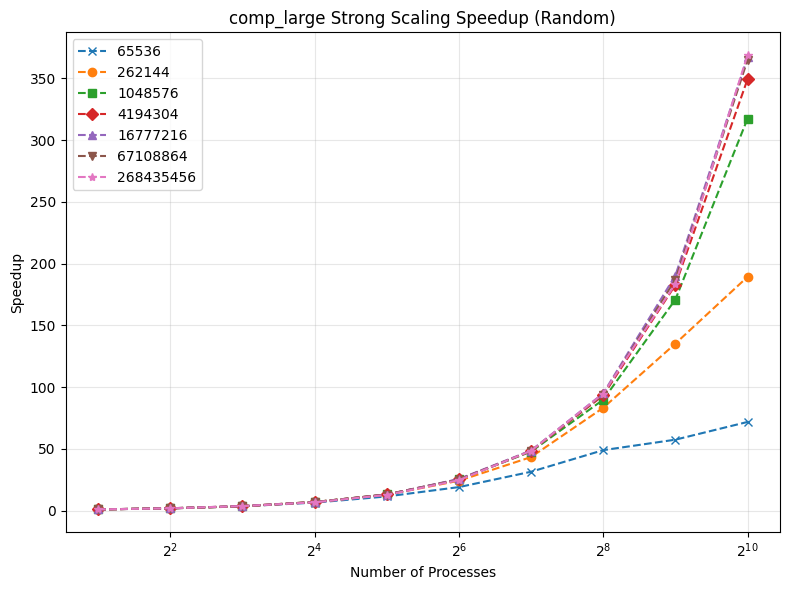

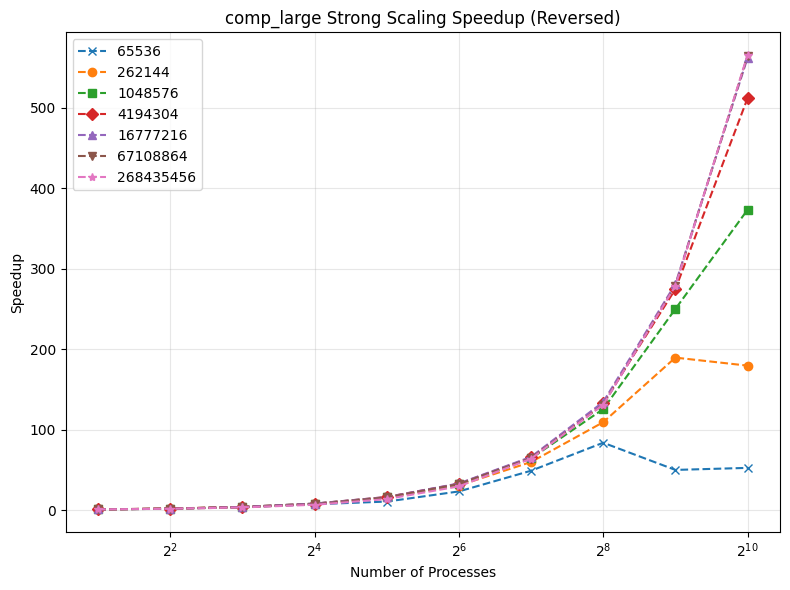

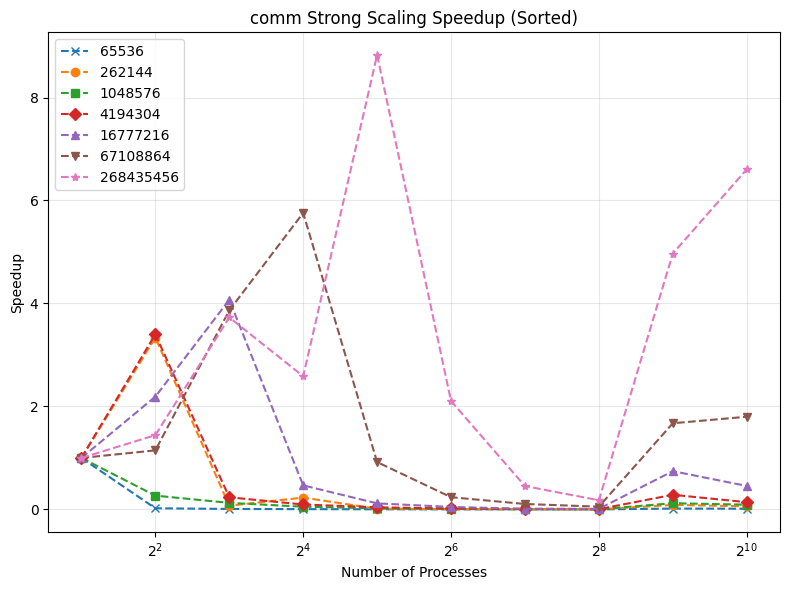

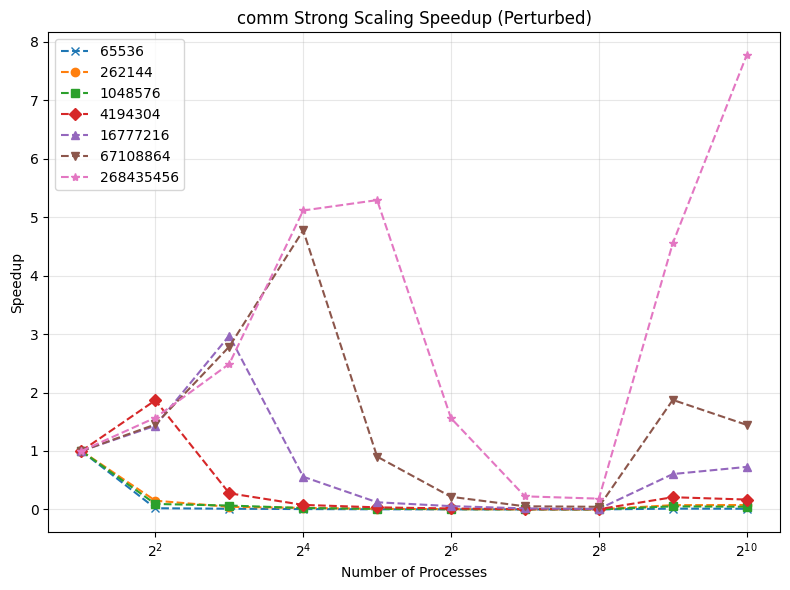

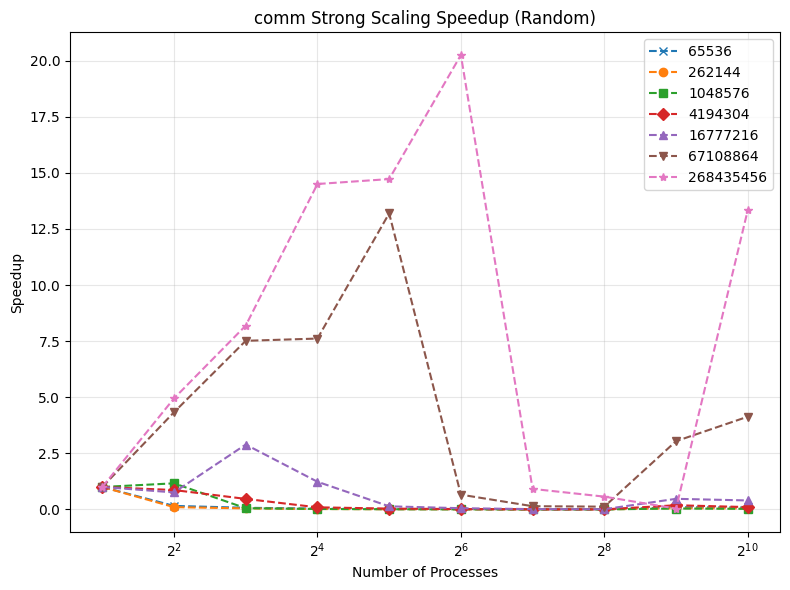

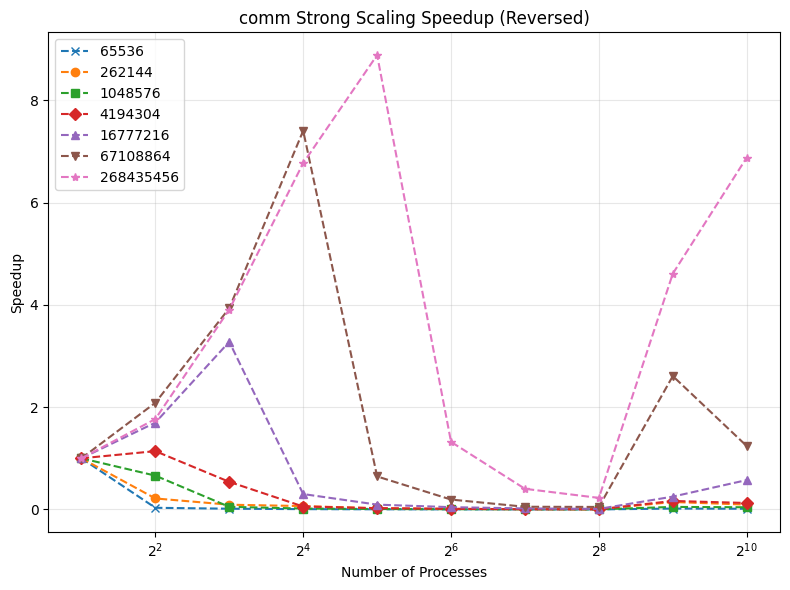

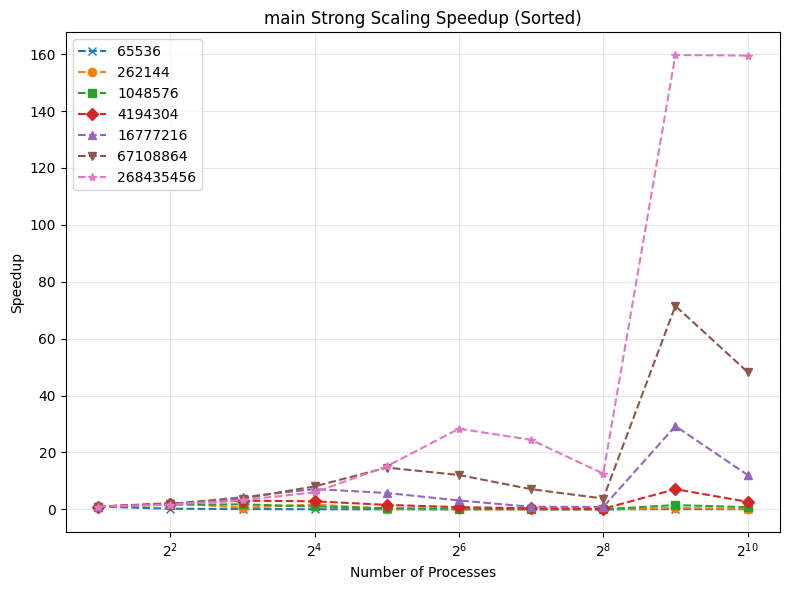

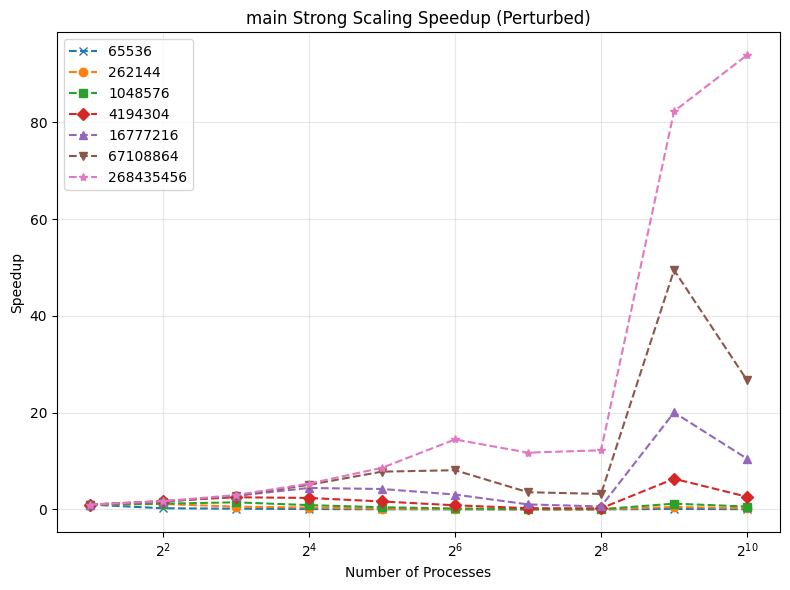

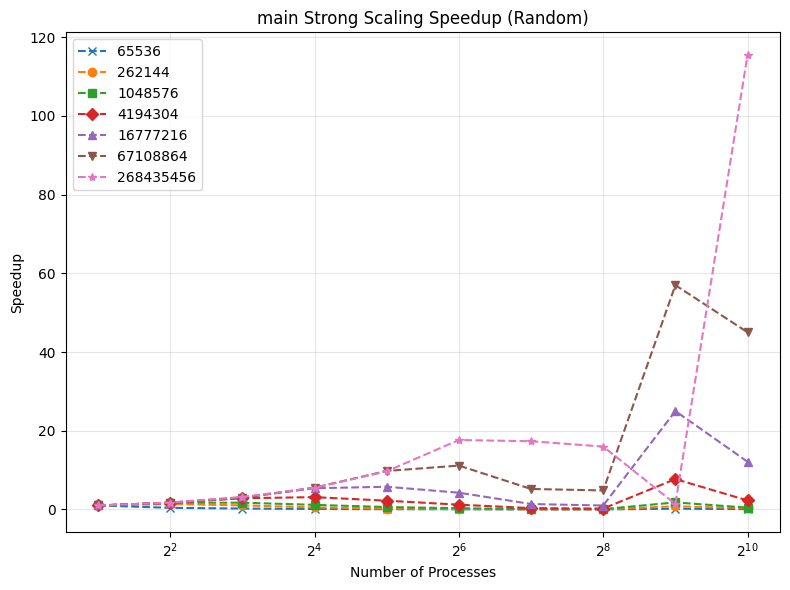

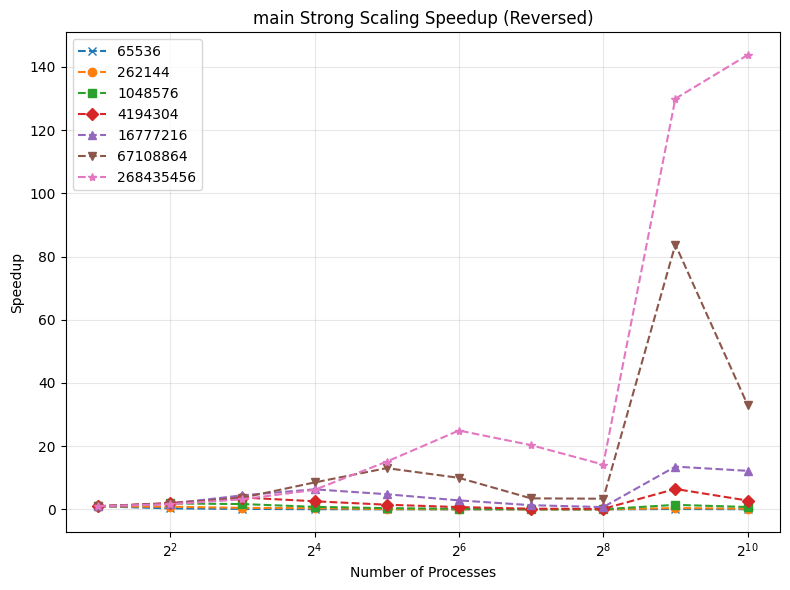

In [ ]:
# 2. Strong scaling speedup plot for each input_type
time = ['Min time/rank', 'Max time/rank', 'Avg time/rank']
marker_list = ['x', 'o', 's', 'D','^','v','*']
line_styles = ['--', '--', '--', '--','--', '--', '--']
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
for region in regions:
    for idx, input_type in enumerate(input_types):
        fig, ax = plt.subplots(figsize=(8, 6))
        style = 0
        for fixed_size in input_sizes:
            times, procs = [], []
            for num_proc in num_procs_list:
                mask = (df['name'] == region) & \
                    (df['input_size'] == fixed_size) & \
                    (df['num_procs'] == num_proc) & \
                    (df['input_type'] == input_type)
                data = df[mask]
                if len(data) > 0:
                    times.append(data[time[2]].iloc[0])
                    procs.append(num_proc)
            if len(times) > 0:
                speedup = [times[0] / t for t in times]
                ax.plot(procs, speedup, marker=marker_list[style], linestyle=line_styles[style],
                        label=fixed_size)
            style += 1
        ax.set_xlabel('Number of Processes')
        ax.set_ylabel('Speedup')
        ax.set_title(
            f'{region} Strong Scaling Speedup ({input_type_map[input_type]})')
        ax.set_xscale('log', base=2)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best')
        plt.tight_layout()
        plt.savefig(
            os.path.join(strong_scaling_speedup_plot_dir, f'strong_scaling_speedup_{region}_input_type_{input_type_map[input_type]}.png'), dpi=150)
        plt.show()

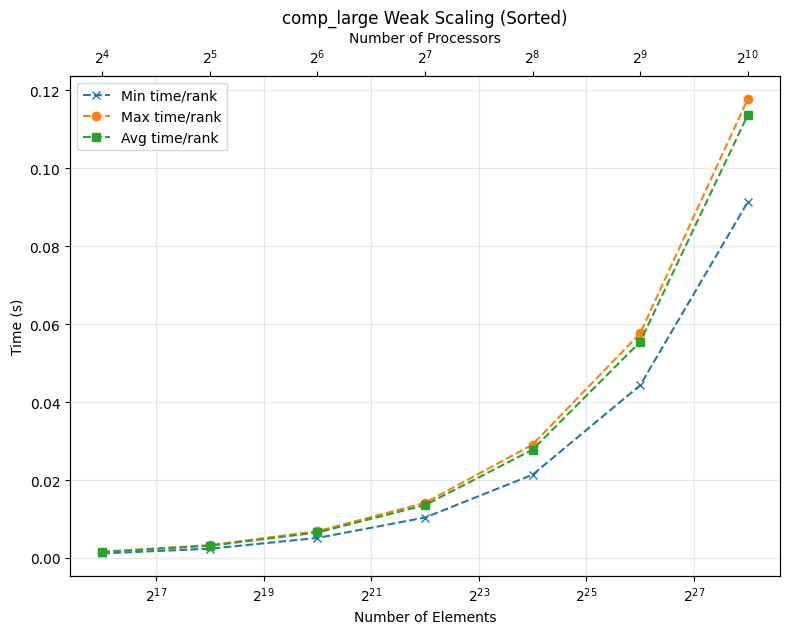

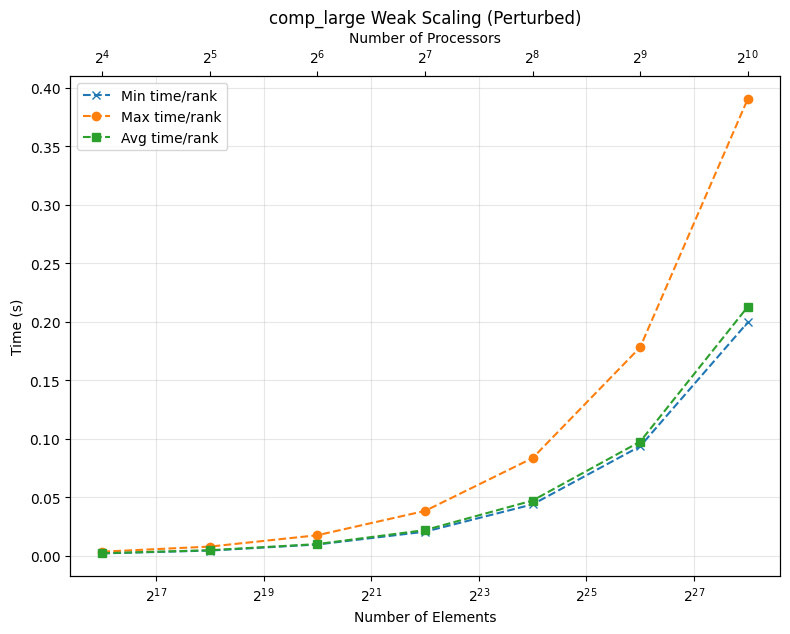

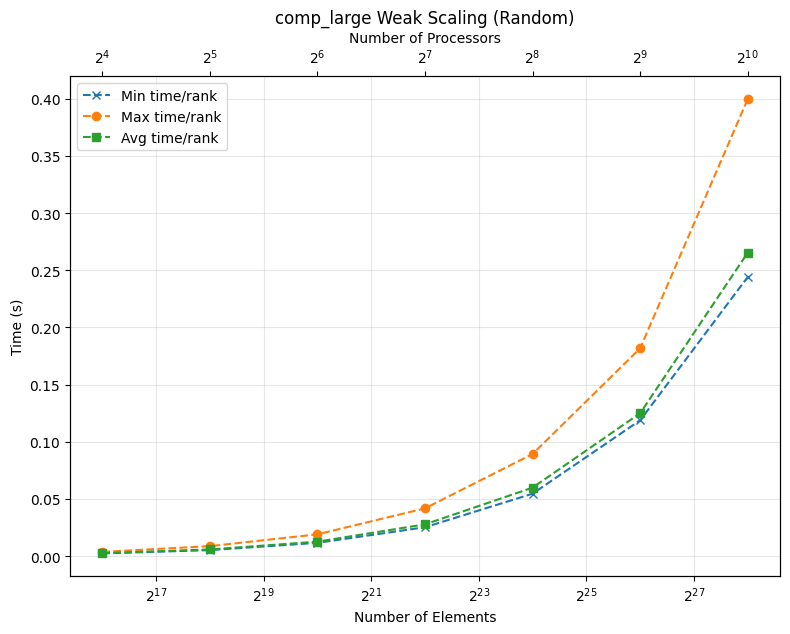

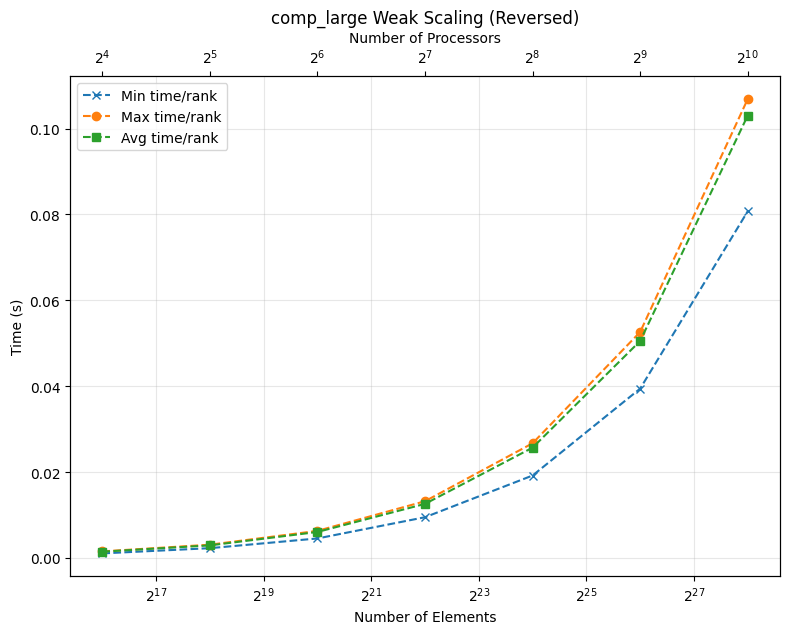

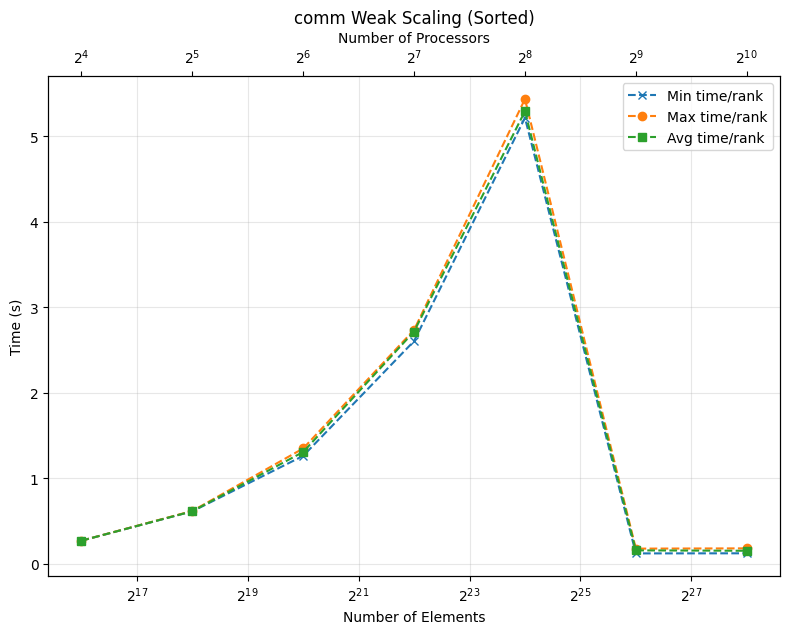

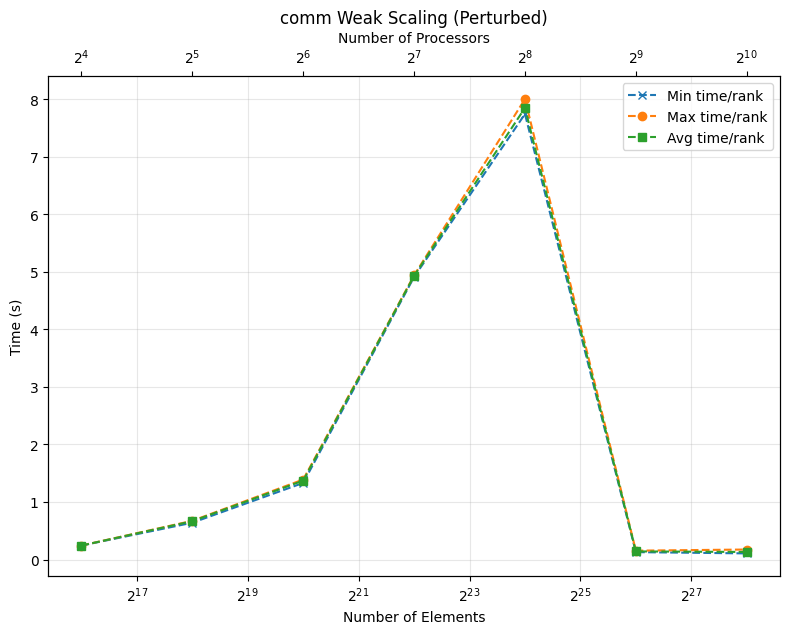

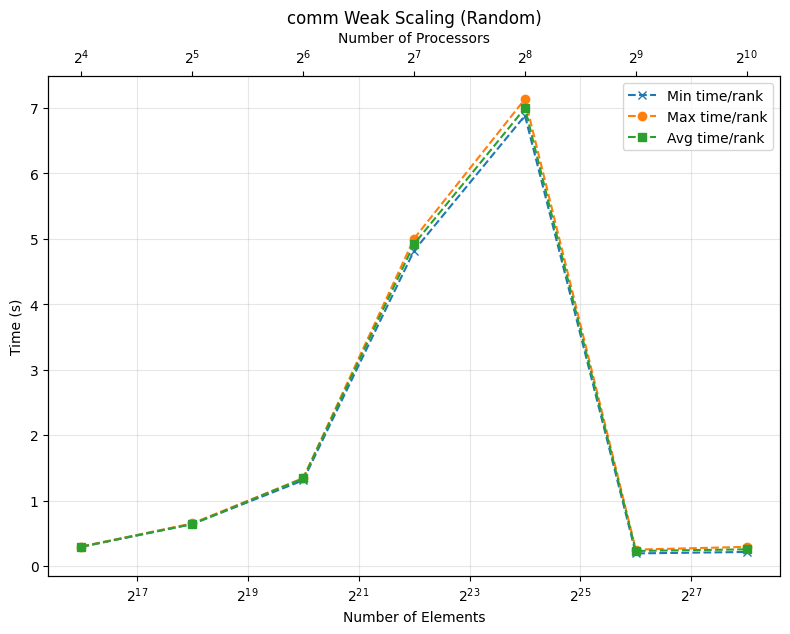

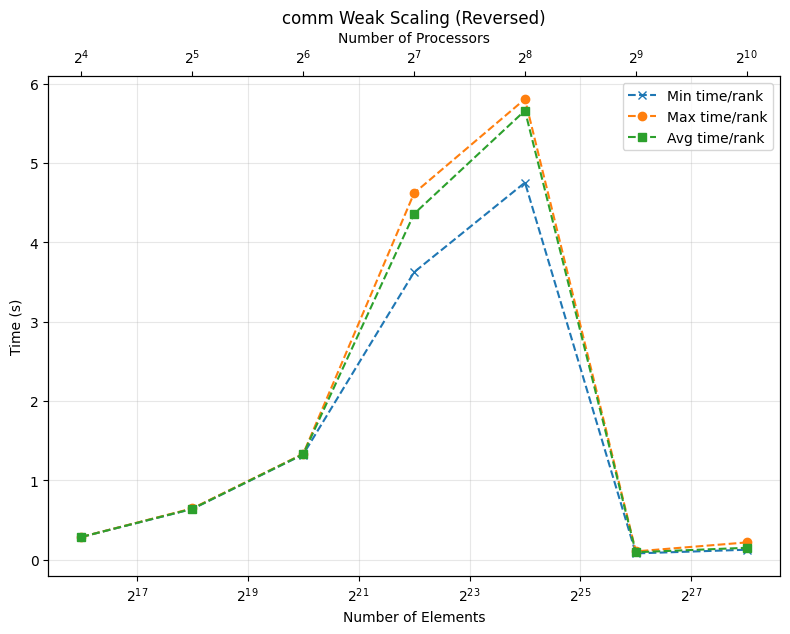

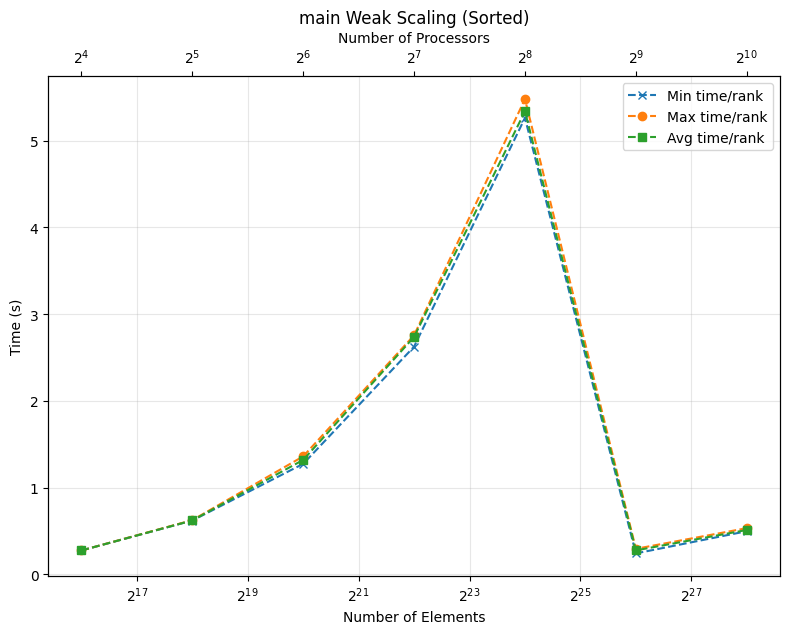

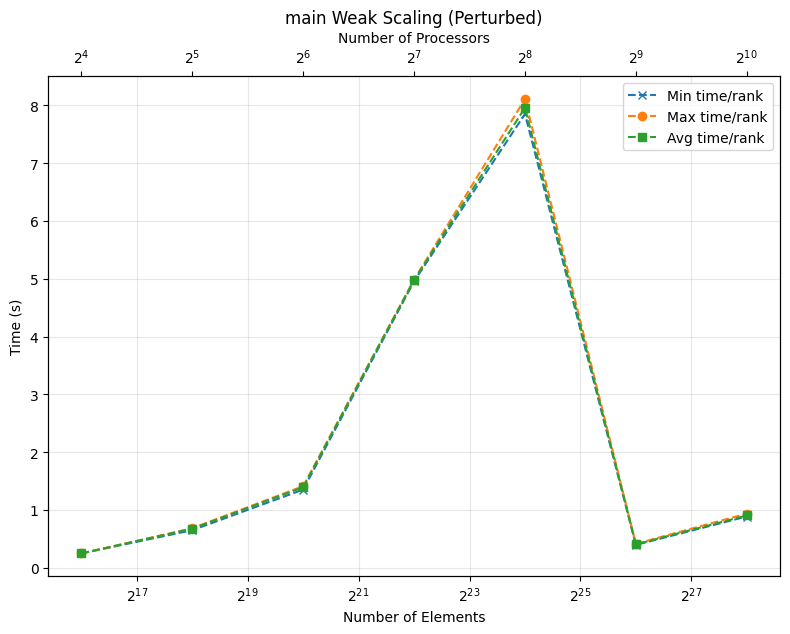

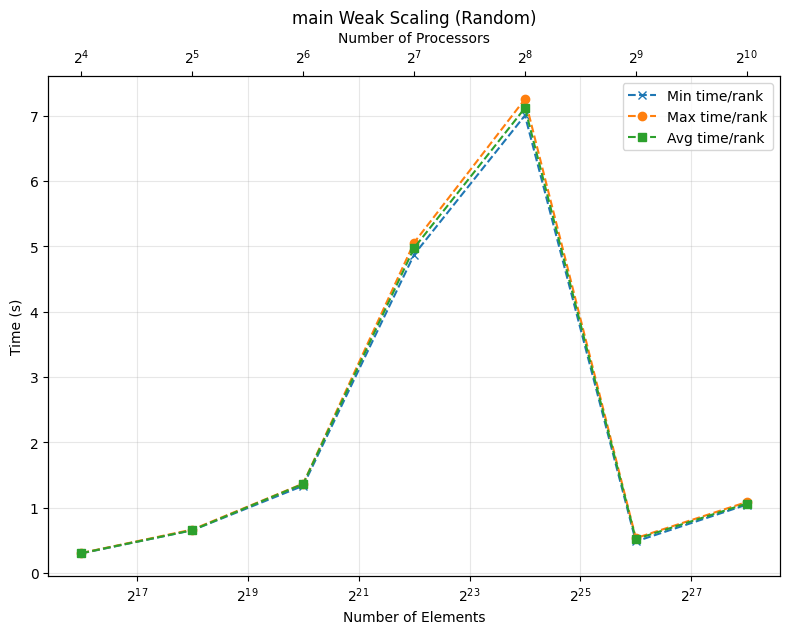

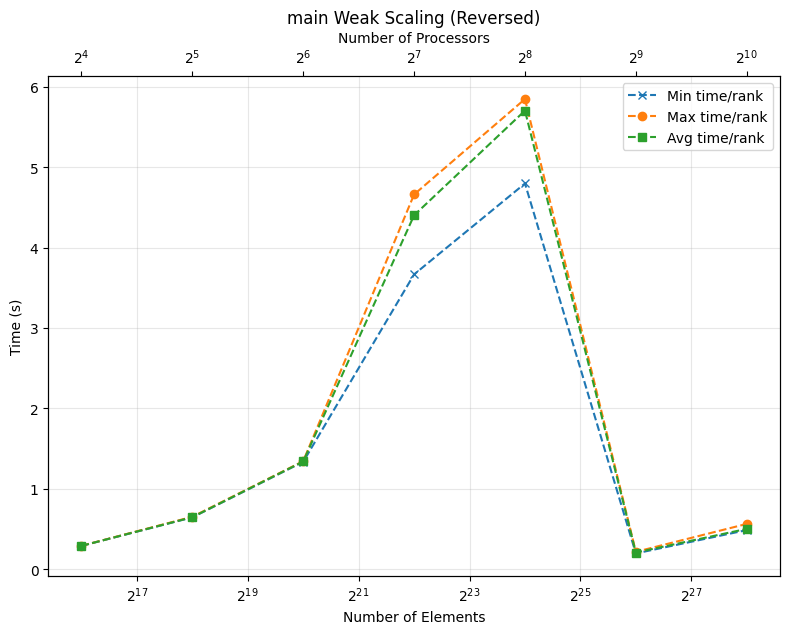

In [ ]:
# 3. Weak scaling plots for each input_type
times_cols = ['Min time/rank', 'Max time/rank', 'Avg time/rank']
marker_list = ['x', 'o', 's', 'D']
line_styles = ['--', '--', '--', '--']
weak_scaling_procs = [16, 32, 64, 128, 256, 512, 1024]
num_of_elements = []
for region in regions:
    for idx, input_type in enumerate(input_types):
        fig, ax = plt.subplots(figsize=(8, 6))
        style = 0
        for t in times_cols:
            times = []
            num_of_elements = []

            for input_size, num_proc in weak_scaling_configs:
                mask = (
                    (df['name'] == region) &
                    (df['input_size'] == input_size) &
                    (df['num_procs'] == num_proc) &
                    (df['input_type'] == input_type)
                )
                data = df[mask]
                if len(data) > 0:
                    times.append(data[t].iloc[0])
                    num_of_elements.append(input_size)
            if len(times) > 0:
                ax.plot(
                    num_of_elements,
                    times,
                    marker=marker_list[style],
                    linestyle=line_styles[style],
                    label=t
                )
            style+= 1
        ax.set_xlabel('Number of Elements')
        ax.set_ylabel('Time (s)')
        ax.set_title(f'{region} Weak Scaling ({input_type_map[input_type]})')
        ax.set_xscale('log', base=2)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best')
        plt.tight_layout()
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xscale('log', base=2)
        ax_top.set_xticks(num_of_elements)
        ax_top.set_xticklabels([f"$2^{{{int(np.log2(p))}}}$" for p in weak_scaling_procs])
        ax_top.set_xlabel('Number of Processors')
        plt.savefig(
            os.path.join(weak_scaling_plot_dir, f'weak_scaling_{region}_input_type_{input_type_map[input_type]}.png'), dpi=150,bbox_inches="tight")
        plt.show()

In [ ]:
# UNUSED CODE PORTION
#plt.savefig(os.path.join(plot_dir, f'{plot_title.replace(" ", "_").replace("/", "_")}.png'), dpi=150, bbox_inches='tight')
#ax.plot([np.log2(s) for s in sizes], times,
#                    marker=marker_list[idx], linestyle=line_styles[idx],
#                    label=input_type_map[input_types[idx]])

# --- Experiment 1: 2 nodes, 64 processes, vary number of elements ---
# fixed_procs = 64
# for region in regions:
#     fig, ax = plt.subplots(figsize=(7, 6))
#     for idx, input_type in enumerate(input_types):
#         times, sizes = [], []
#         for input_size in input_sizes:
#             mask = (df['name'] == region) & \
#                    (df['input_size'] == input_size) & \
#                    (df['num_procs'] == fixed_procs) & \
#                    (df['input_type'] == input_type)
#             data = df[mask]
#             if len(data) > 0:
#                 times.append(data[time_col].iloc[0])
#                 sizes.append(input_size)
#         if len(times) > 0:
#             ax.plot([np.log2(s) for s in sizes], times,
#                     marker=marker_list[idx], linestyle=line_styles[idx],
#                     label=input_type_map[input_types[idx]])
#     ax.set_xlabel('Input Size (log 2 scaled)')
#     ax.set_ylabel('Time (s)')
#     plot_title = f'{region} Time vs Input Size (64 procs)'
#     ax.set_title(plot_title)
#     ax.grid(True, alpha=0.3)
#     ax.legend(title='Input Type', loc='best')
#     plt.tight_layout()
#     plt.savefig(os.path.join(plot_dir, f'{plot_title.replace(" ", "_").replace("/", "_")}.png'), dpi=150, bbox_inches='tight')
#     plt.show()

In [ ]:
# --- Experiment 2: Strong scaling (2^22 elements, vary number of processes) ---
# fixed_size = 2**22
# for region in regions:
#     fig, ax = plt.subplots(figsize=(7, 6))
#     for idx, input_type in enumerate(input_types):
#         times, procs = [], []
#         for num_proc in num_procs_list:
#             mask = (df['name'] == region) & \
#                    (df['input_size'] == fixed_size) & \
#                    (df['num_procs'] == num_proc) & \
#                    (df['input_type'] == input_type)
#             data = df[mask]
#             if len(data) > 0:
#                 times.append(data[time_col].iloc[0])
#                 procs.append(num_proc)
#         if len(times) > 0:
#             ax.plot(procs, times,
#                     marker=marker_list[idx], linestyle=line_styles[idx],
#                     label=input_types[idx])
#     ax.set_xlabel('Number of Processes')
#     ax.set_ylabel('Time (s)')
#     plot_title = f'{region} Strong Scaling (2^22 elements)'
#     ax.set_title(plot_title)
#     ax.set_xscale('log', base=2)
#     ax.grid(True, alpha=0.3)
#     ax.legend(title='Input Type', loc='best')
#     plt.tight_layout()
#     plt.savefig(os.path.join(plot_dir, f'{plot_title.replace(" ", "_").replace("/", "_")}.png'),
#                 dpi=150, bbox_inches='tight')
#     plt.show()

In [ ]:
# # --- Experiment 3: Weak scaling ---
# weak_scaling_configs = [
#     (2**16, 16), (2**18, 32), (2**20, 64),
#     (2**22, 128), (2**24, 256), (2**26, 512), (2**28, 1024)
# ]
# for region in regions:
#     fig, ax = plt.subplots(figsize=(7, 6))
#     for idx, input_type in enumerate(input_types):
#         times, procs = [], []
#         for input_size, num_proc in weak_scaling_configs:
#             mask = (df['name'] == region) & \
#                    (df['input_size'] == input_size) & \
#                    (df['num_procs'] == num_proc) & \
#                    (df['input_type'] == input_type)
#             data = df[mask]
#             if len(data) > 0:
#                 times.append(data[time_col].iloc[0])
#                 procs.append(num_proc)
#         if len(times) > 0:
#             ax.plot(procs, times,
#                     marker=marker_list[idx], linestyle=line_styles[idx],
#                     label=input_types[idx])
#     ax.set_xlabel('Number of Processes')
#     ax.set_ylabel('Time (s)')
#     plot_title = f'{region} Weak Scaling'
#     ax.set_title(plot_title)
#     ax.set_xscale('log', base=2)
#     ax.grid(True, alpha=0.3)
#     ax.legend(title='Input Type', loc='best')
#     plt.tight_layout()
#     plt.savefig(os.path.join(plot_dir, f'{plot_title.replace(" ", "_").replace("/", "_")}.png'),
#                 dpi=150, bbox_inches='tight')
#     plt.show()

In [ ]:
# --- Experiment 4: Data type comparison (int vs float) ---
# if 'data_type' in df.columns:
#     for region in regions:
#         fig, ax = plt.subplots(figsize=(7, 6))
#         width = 0.35
#         for idx, data_type in enumerate(df['data_type'].unique()):
#             times, types = [], []
#             for input_type in input_types:
#                 mask = (df['name'] == region) & \
#                        (df['input_size'] == fixed_size) & \
#                        (df['num_procs'] == fixed_procs) & \
#                        (df['input_type'] == input_type) & \
#                        (df['data_type'] == data_type)
#                 data = df[mask]
#                 if len(data) > 0:
#                     times.append(data[time_col].iloc[0])
#                     types.append(input_type)
#             if len(times) > 0:
#                 x_pos = np.arange(len(types)) + idx * width
#                 ax.bar(x_pos, times, width=width, label=data_type)
#         ax.set_xlabel('Input Type')
#         ax.set_ylabel('Time (s)')
#         plot_title = f'{region} Data Type Comparison (2^22 elements, 64 procs)'
#         ax.set_title(plot_title)
#         ax.set_xticks(np.arange(len(input_types)) + width/2)
#         ax.set_xticklabels([input_type for input_type in input_types])
#         ax.legend(title='Data Type', loc='best')
#         ax.grid(True, alpha=0.3, axis='y')
#         plt.tight_layout()
#         plt.savefig(os.path.join(plot_dir, f'{plot_title.replace(" ", "_").replace("/", "_")}.png'), dpi=150, bbox_inches='tight')
#         plt.show()
# else:
#     print("Warning: 'data_type' column not found. Run experiments with both int and float.")

In [ ]:
# --- Experiment 5: Input type comparison (2^22 elements, 64 processes) ---
# for region in regions:
#     fig, ax = plt.subplots(figsize=(7, 6))
#     times, labels = [], []
#     for idx, input_type in enumerate(input_types):
#         mask = (df['name'] == region) & \
#                (df['input_size'] == fixed_size) & \
#                (df['num_procs'] == fixed_procs) & \
#                (df['input_type'] == input_type)
#         data = df[mask]
#         if len(data) > 0:
#             times.append(data[time_col].iloc[0])
#             labels.append(input_types[idx])
#     if len(times) > 0:
#         bars = ax.bar(labels, times)
#         ax.set_ylabel('Time (s)')
#         plot_title = f'{region} Input Type Comparison (2^22 elements, 64 procs)'
#         ax.set_title(plot_title)
#         ax.grid(True, alpha=0.3, axis='y')
#         for bar in bars:
#             height = bar.get_height()
#             ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}s', ha='center', va='bottom')
#         plt.tight_layout()
#         plt.savefig(os.path.join(plot_dir, f'{plot_title.replace(" ", "_").replace("/", "_")}.png'), dpi=150, bbox_inches='tight')
#         plt.show()

In [ ]:
# df = df_merged
# regions = ['comp_large', 'comm', 'main']
# #input_types = [0, 1, 2, 3]
# #input_type_map = {0: 'Sorted', 1: 'Perturbed', 2: 'Random', 3: 'Reversed'}
# input_types = ['random','reversed','sorted','perturbed1']
# input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
# num_procs_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# weak_scaling_configs = [
#     (2**16, 16), (2**18, 32), (2**20, 64),
#     (2**22, 128), (2**24, 256), (2**26, 512), (2**28, 1024)
# ]
# time_col = 'Total time' if 'Total time' in df.columns else 'time'
# plt.style.use('default')
# marker_list = ['x', 'o', 's', 'D']
# line_styles = ['-', '--', '-.', ':']

# # 1. Strong scaling plots for each input_size
# for region in regions:
#     for input_size in input_sizes:
#         fig, ax = plt.subplots(figsize=(8, 6))
#         for idx, input_type in enumerate(input_types):
#             times, procs = [], []
#             for num_proc in num_procs_list:
#                 mask = (df['name'] == region) & \
#                        (df['input_size'] == input_size) & \
#                        (df['num_procs'] == num_proc) & \
#                        (df['input_type'] == input_type)
#                 data = df[mask]
#                 if len(data) > 0:
#                     times.append(data[time_col].iloc[0])
#                     procs.append(num_proc)
#             if len(times) > 0:
#                 ax.plot(procs, times, marker=marker_list[idx], linestyle=line_styles[idx],
#                         label=input_types[idx])
#         ax.set_xlabel('Number of Processes')
#         ax.set_ylabel('Time (s)')
#         ax.set_title(f'{region} Strong Scaling (Input Size={input_size})')
#         ax.set_xscale('log', base=2)
#         ax.grid(True, alpha=0.3)
#         ax.legend(title='Input Type', loc='best')
#         plt.tight_layout()
#         plt.savefig(
#             f'plots/strong_scaling_{region}_inputsize_{input_size}.png', dpi=150)
#         plt.show()
